In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report


In [4]:

# mount google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [5]:
# load dataframe
df = pd.read_csv('restaurants.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [6]:
# check for null values
df.isna().sum()

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64

In [7]:
df.shape

(4411, 21)

In [8]:
# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)

In [9]:
print(df.describe())

       Average Cost for two  Price range  Aggregate rating         Votes
count           4410.000000  4410.000000       4410.000000   4410.000000
mean             614.488209     1.948753          2.979365    230.257596
std              611.360475     0.931593          1.398345    565.640599
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.800000     10.000000
50%              450.000000     2.000000          3.400000     52.000000
75%              750.000000     3.000000          3.900000    201.000000
max             7000.000000     4.000000          4.900000  10934.000000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  4410 non-null   float64
 1   Has Table booking     4410 non-null   object 
 2   Has Online delivery   4410 non-null   object 
 3   Is delivering now     4410 non-null   object 
 4   Switch to order menu  4410 non-null   object 
 5   Price range           4410 non-null   float64
 6   Aggregate rating      4410 non-null   float64
 7   Rating color          4410 non-null   object 
 8   Rating text           4410 non-null   object 
 9   Votes                 4410 non-null   float64
dtypes: float64(4), object(6)
memory usage: 344.7+ KB


In [11]:
# encode the yes-no labels of categorical features into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

In [12]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100.0,1,0,0,0,3.0,4.8,0,1,314.0
1,1200.0,1,0,0,0,3.0,4.5,0,1,591.0
2,4000.0,1,0,0,0,4.0,4.4,1,5,270.0
3,1500.0,0,0,0,0,4.0,4.9,0,1,365.0
4,1500.0,1,0,0,0,4.0,4.8,0,1,229.0
...,...,...,...,...,...,...,...,...,...,...
4406,400.0,0,1,0,0,1.0,3.2,2,0,17.0
4407,200.0,0,0,0,0,1.0,3.2,2,0,8.0
4408,350.0,0,0,0,0,1.0,3.2,2,0,26.0
4409,500.0,0,1,0,0,2.0,3.3,2,0,85.0


In [13]:
df.shape

(4411, 10)

<Axes: ylabel='count'>

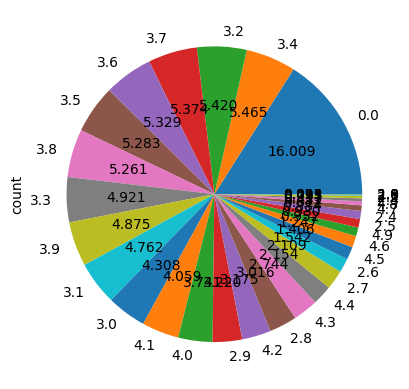

In [14]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.3f')

<ipython-input-15-00528cf33232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Density'>

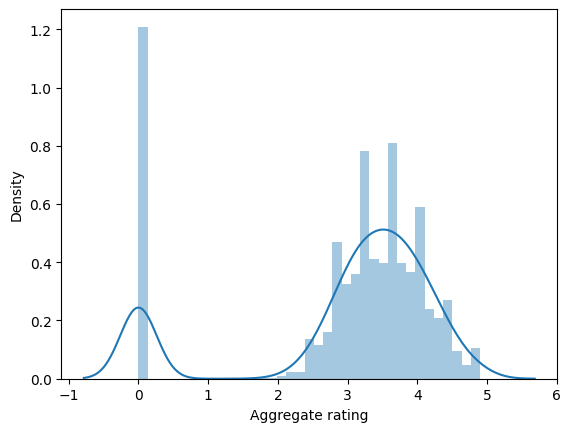

In [15]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

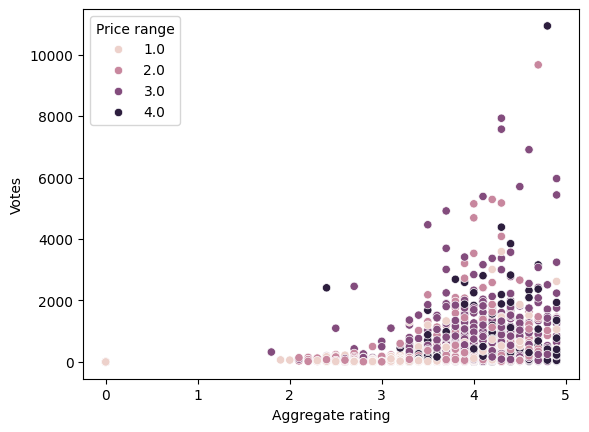

In [16]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

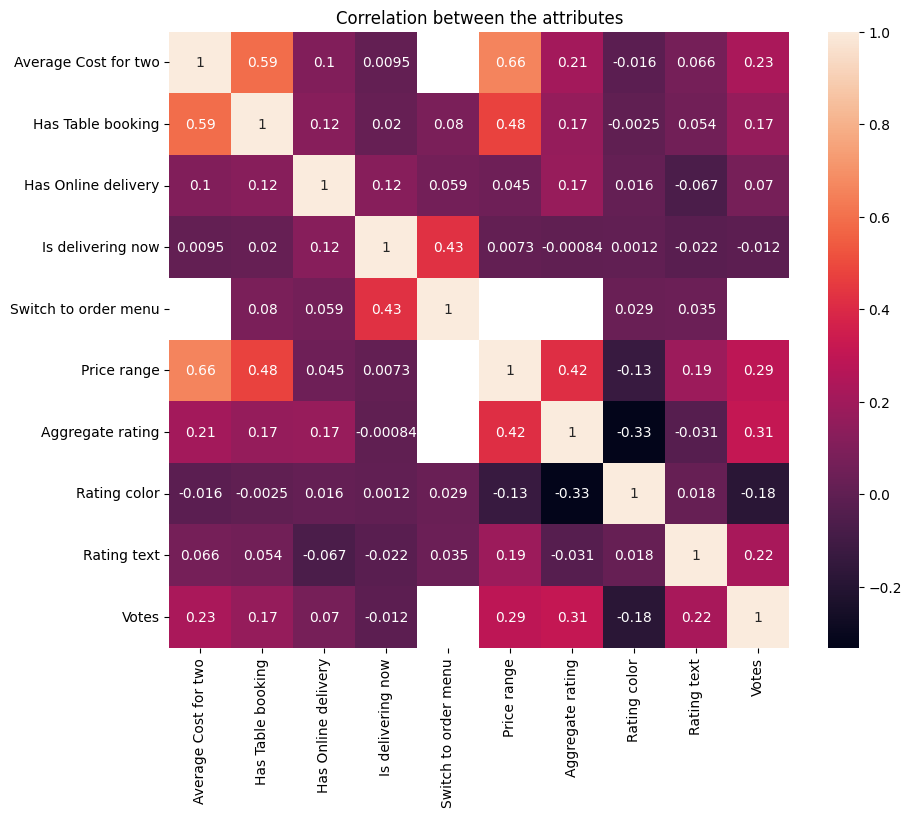

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()


In [18]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [19]:
# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

3696    4.1
3998    4.2
1688    0.0
3158    3.6
2426    4.2
Name: Aggregate rating, dtype: float64

In [20]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (3528, 9)
x_test:  (883, 9)
y_train:  (3528,)
y_test:  (883,)


In [32]:
x_train = x_train.dropna()
y_train = y_train.dropna()

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

In [34]:
#training by linear regression algorithm
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred=linreg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
#evaluating performance metrics of linear regression
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"MAE of the linear regression model is: {linreg_mae:.2f}")
print(f"MSE of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")

MAE of the linear regression model is: 0.90
MSE of the linear regression model is: 1.26
R2 score of the linear regression model is: 0.34


In [36]:
# training by decision tree regressor algorithm
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [31]:

#evaluating performance metrics of decision tree
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE of the decision tree model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")

NameError: name 'dtree_pred' is not defined